In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
'''
DATASET CITATION:

Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

'''

'\nDATASET CITATION:\n\nCreated by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009\n\nP. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. \n  Modeling wine preferences by data mining from physicochemical properties.\n  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.\n\n'

In [3]:
redPath = 'C:\\Users\\Benjamin\\Desktop\\winequality-red.csv'
whitePath = 'C:\\Users\\Benjamin\\Desktop\\winequality-white.csv'

red = pd.read_csv(redPath,sep=';')
print(red)

white = pd.read_csv(whitePath,sep=';')
print(red)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [4]:
print(red.columns)
print(white.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


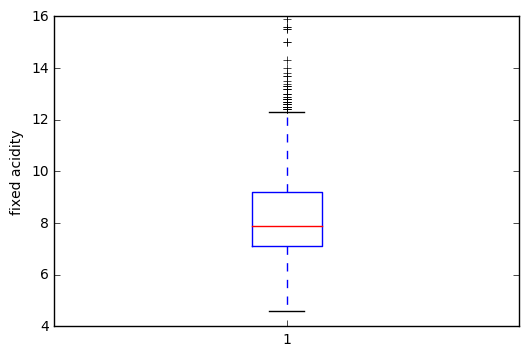

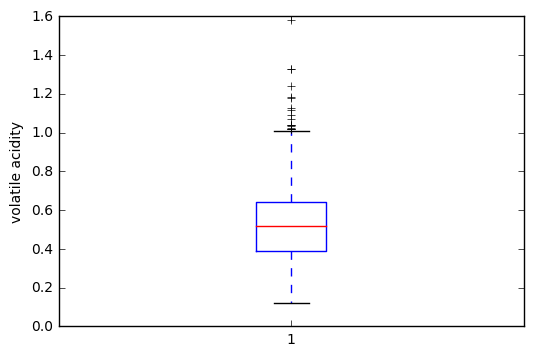

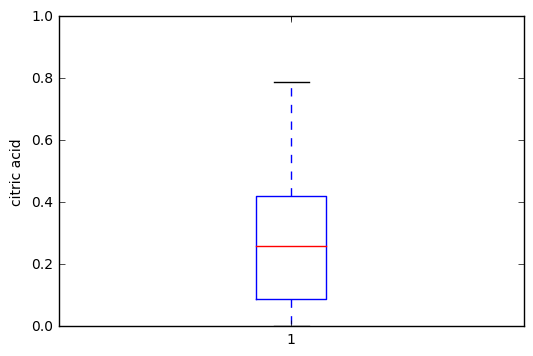

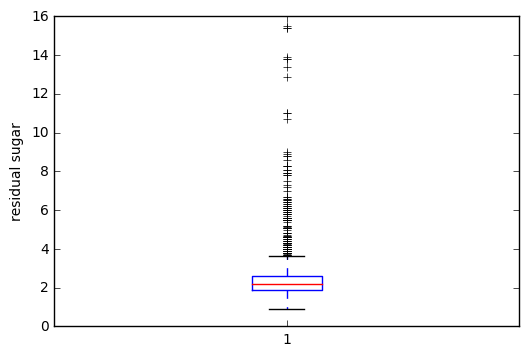

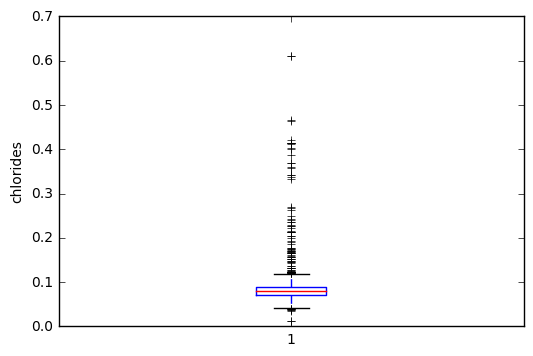

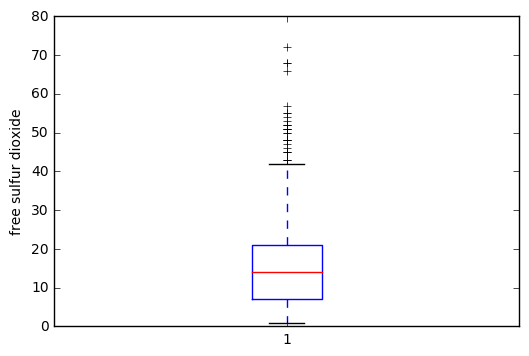

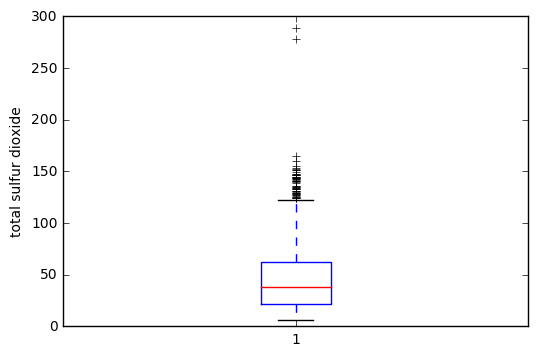

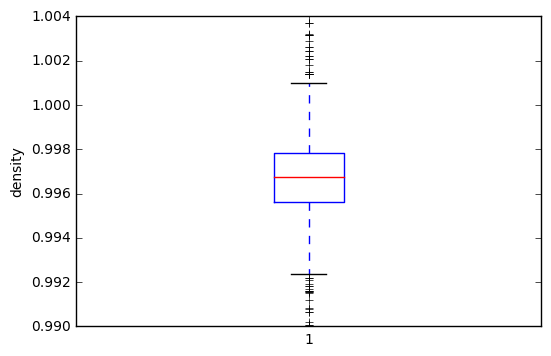

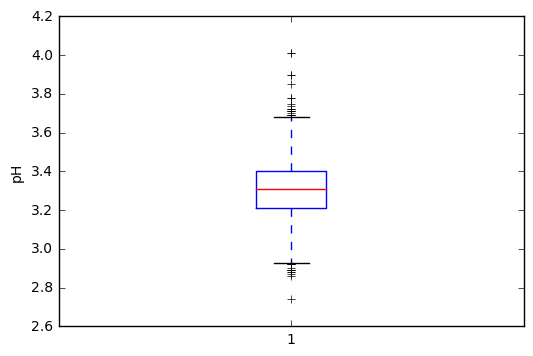

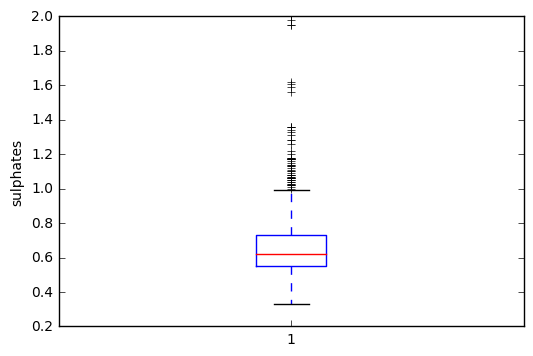

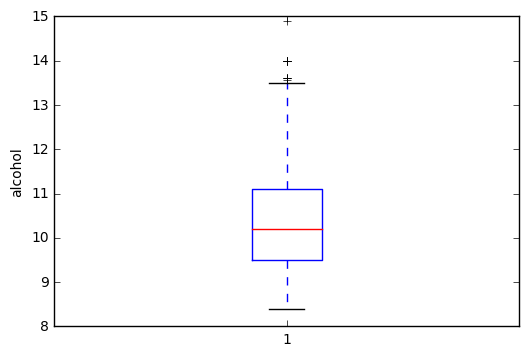

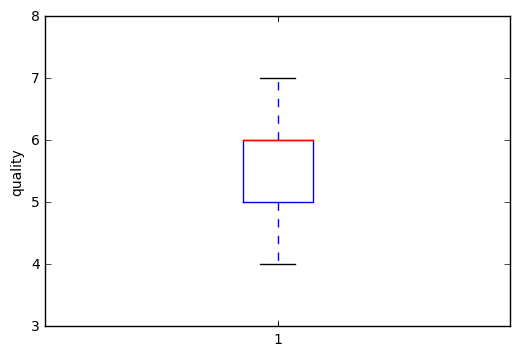

In [7]:
plt.close()
for col in red.columns:
    plt.ylabel(col)
    plt.boxplot(red[col])
    plt.show()

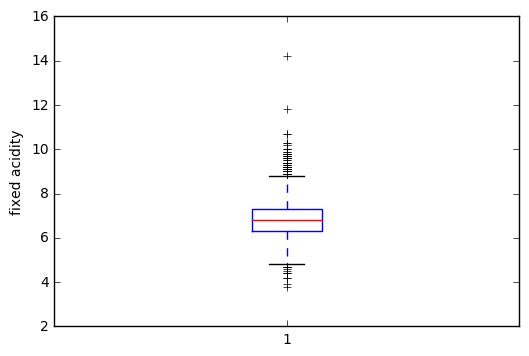

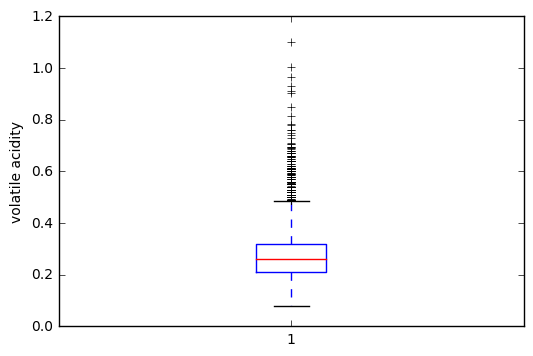

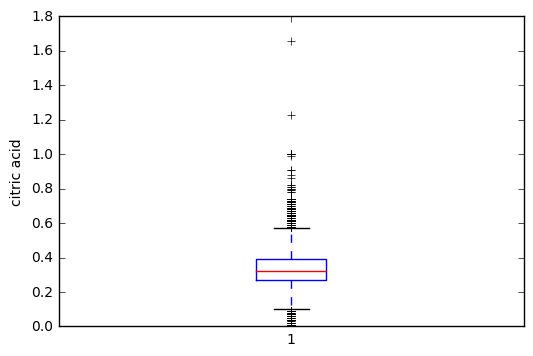

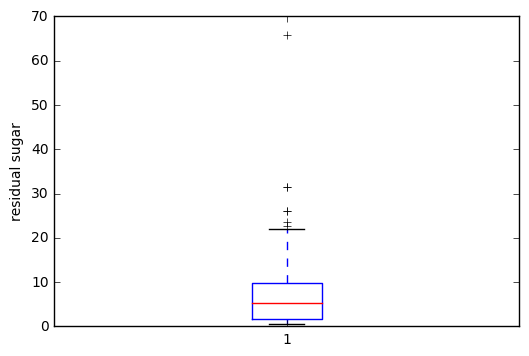

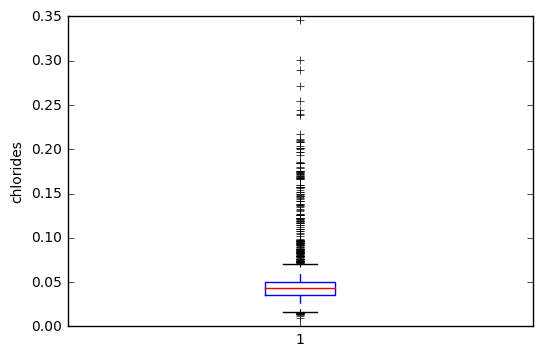

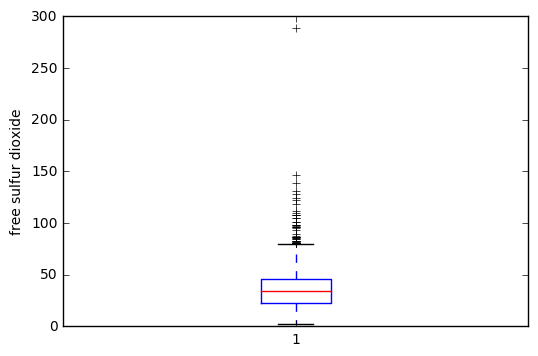

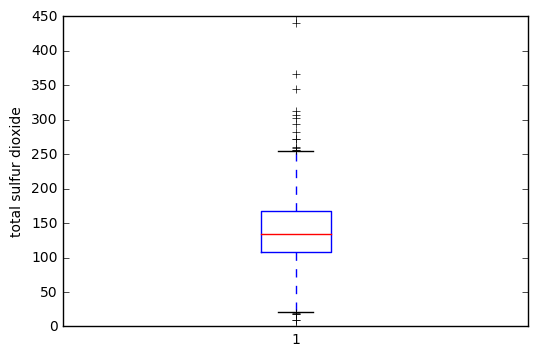

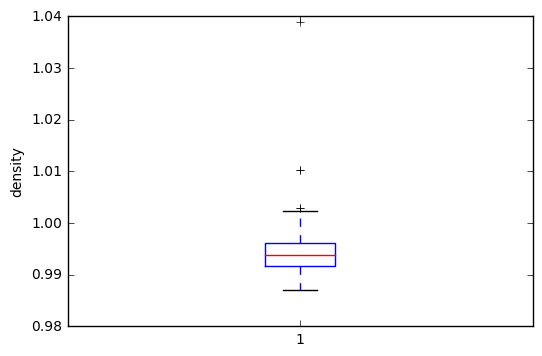

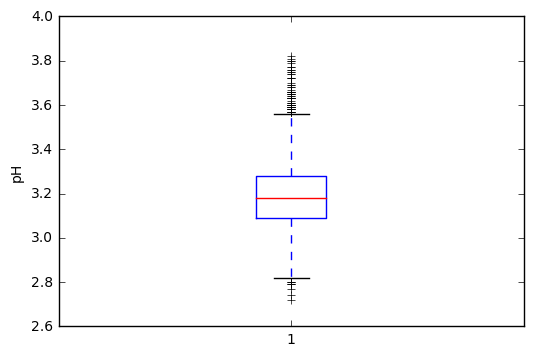

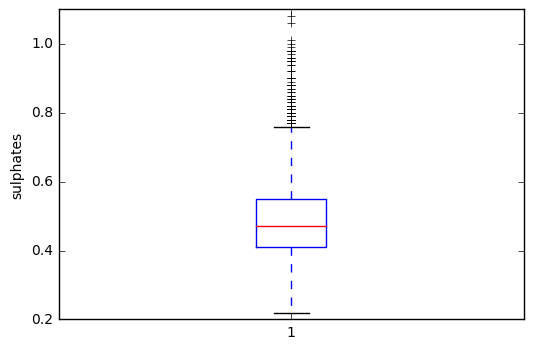

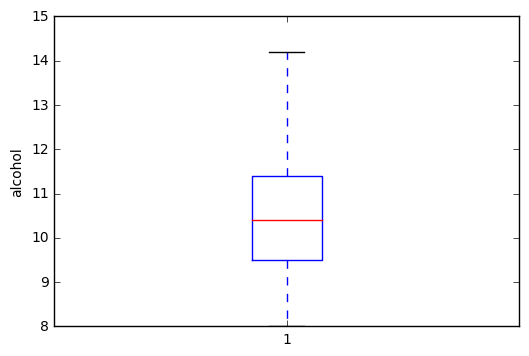

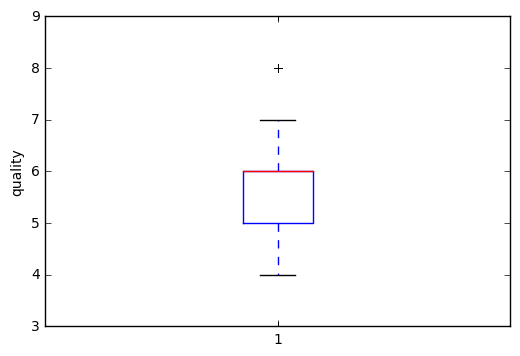

In [8]:
plt.close()
for col in white.columns:
    plt.ylabel(col)
    plt.boxplot(white[col])
    plt.show()

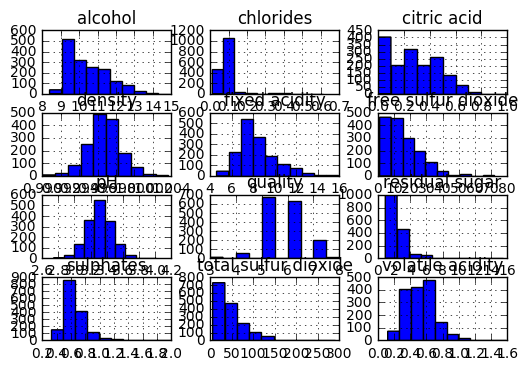

In [9]:
plt.close()
red.hist()
plt.show()

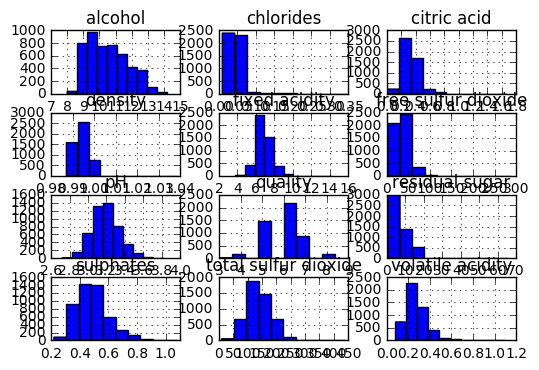

In [10]:
plt.close()
white.hist()
plt.show()

In [75]:
def r():
    return random.randint(0,255)/255

def clusterDataUsingKMeans(clusters=2, df=red):
    c = KMeans(n_clusters=clusters, random_state=0).fit(df).cluster_centers_
    
    k = KMeans(n_clusters=clusters, random_state=0).fit_predict(df)
    df['label'] = k
    
    for index, col in enumerate(df.columns):
        if col == 'quality' or col == 'label':
            continue

        fig, ax = plt.subplots()
        for label in df['label'].unique():            
            subset = df.loc[df['label'] == label, [col,'quality']]
            ax.scatter(subset[col],subset['quality'],alpha=.5,
                       c=[r(),r(),r()], label = str(label+1))
        ax.scatter(c[:,index],c[:,11],color='gold',label='Centroid')
        plt.xlabel(df[col].name)
        plt.ylabel(df['quality'].name)
        plt.show()

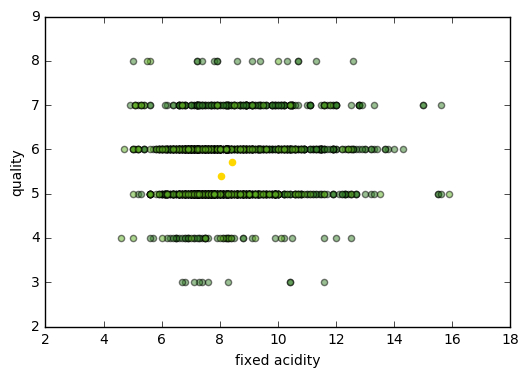

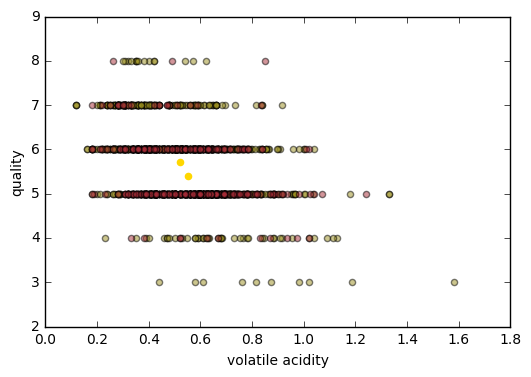

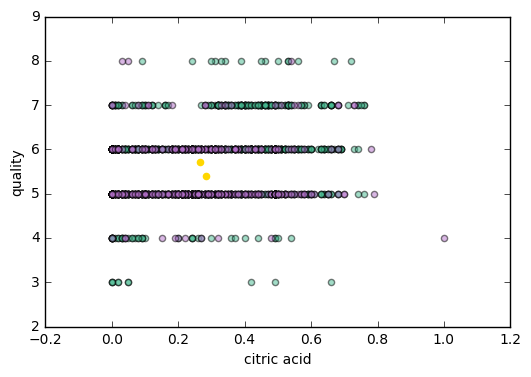

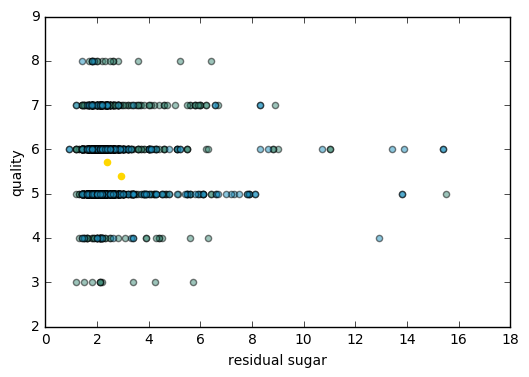

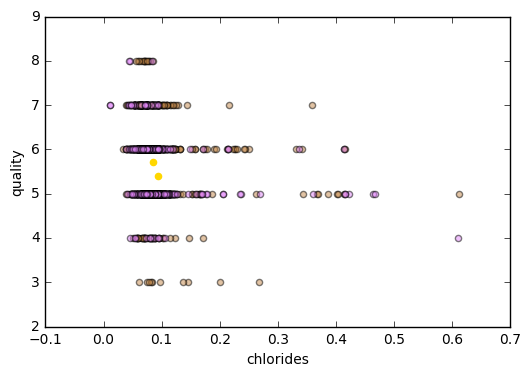

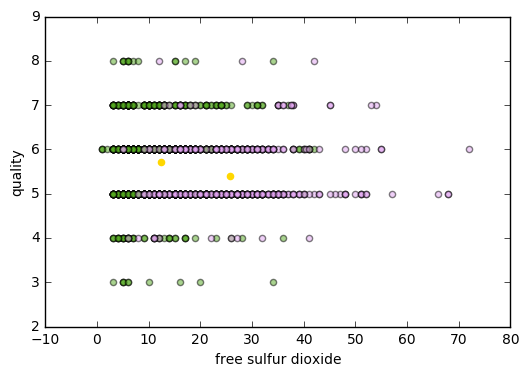

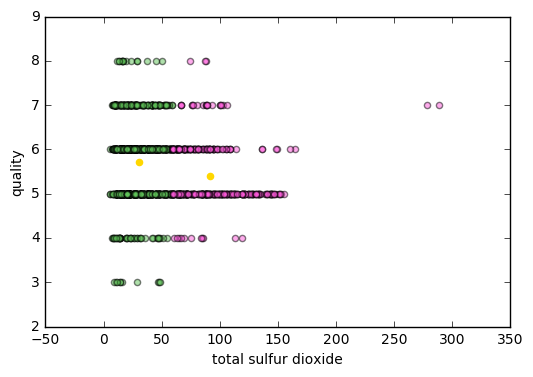

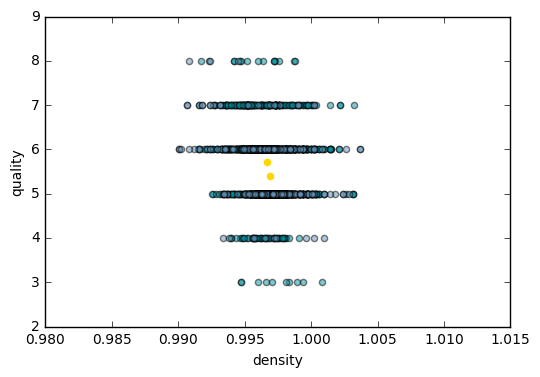

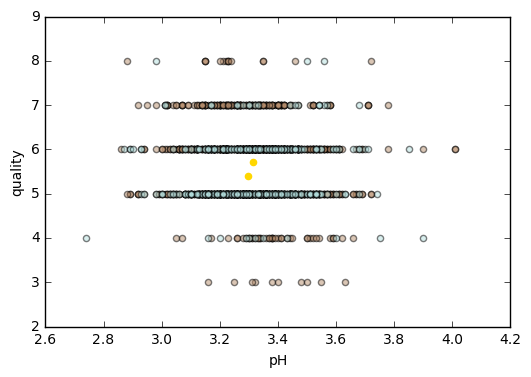

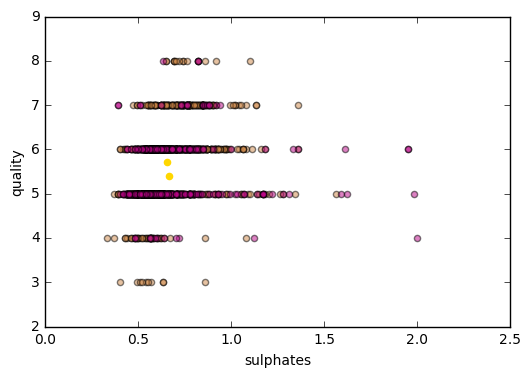

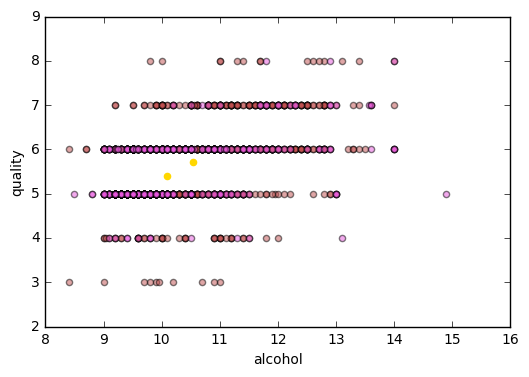

In [76]:
clusterDataUsingKMeans(clusters = 2, df=red)

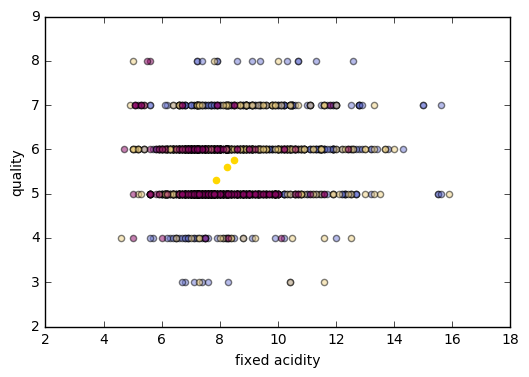

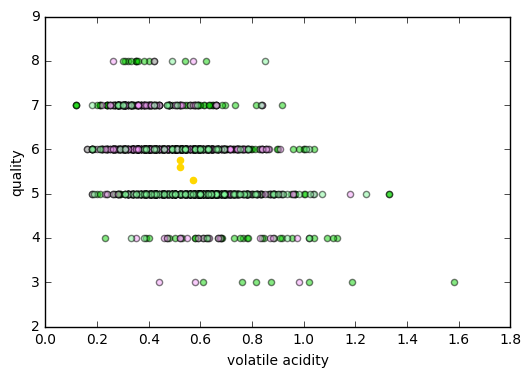

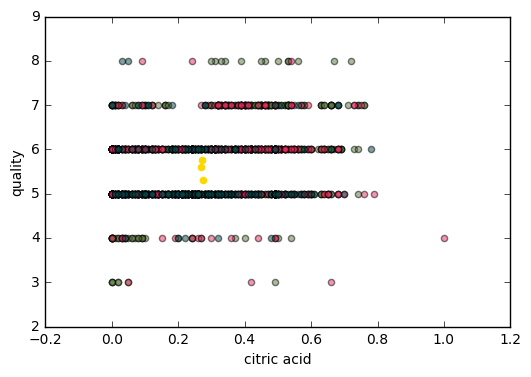

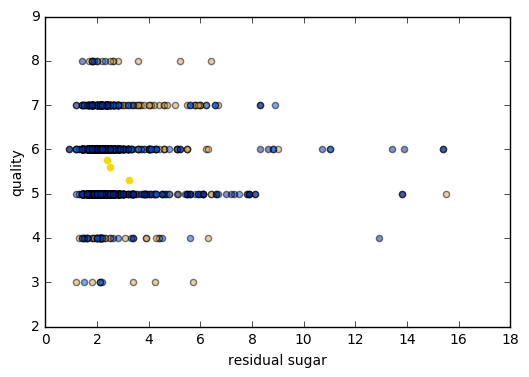

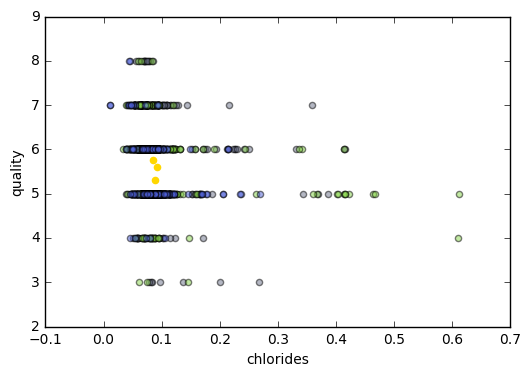

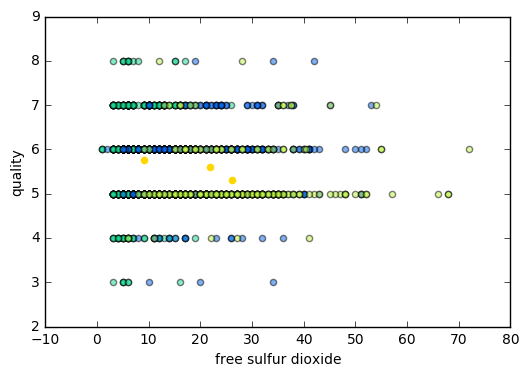

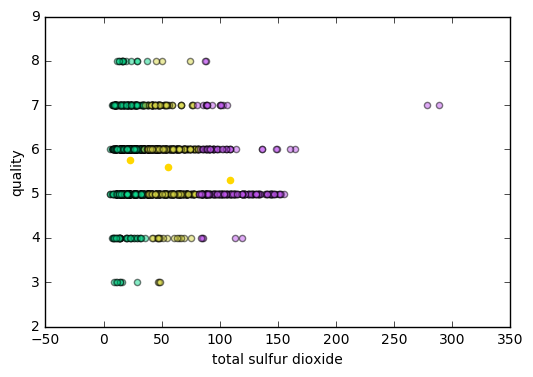

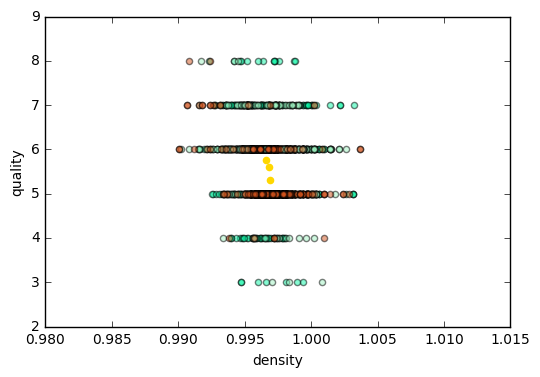

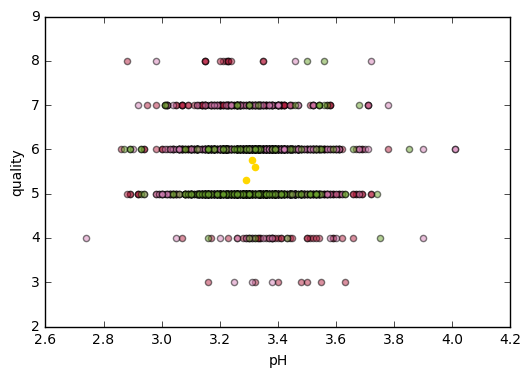

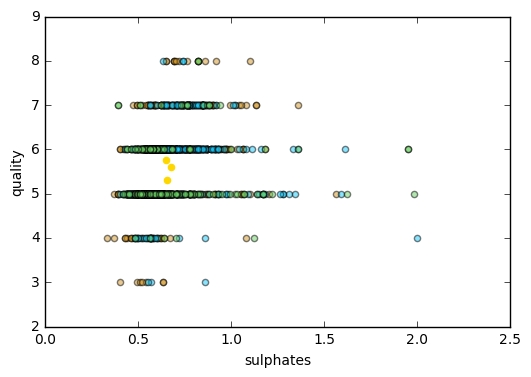

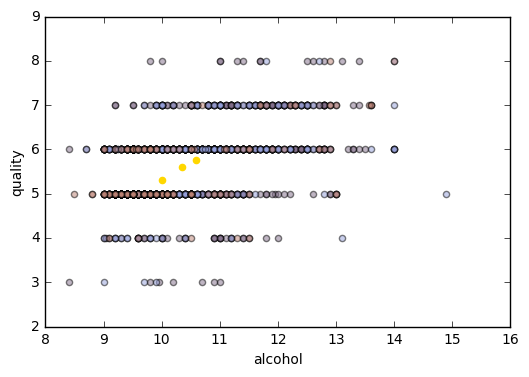

In [77]:
clusterDataUsingKMeans(clusters = 3, df=red)

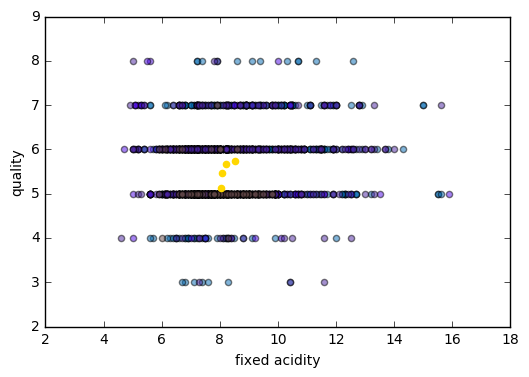

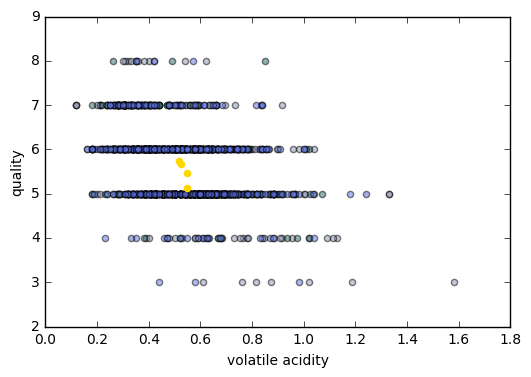

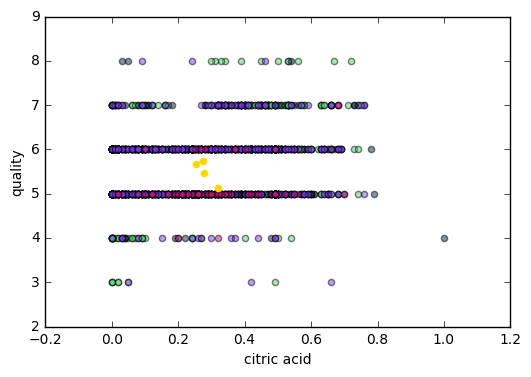

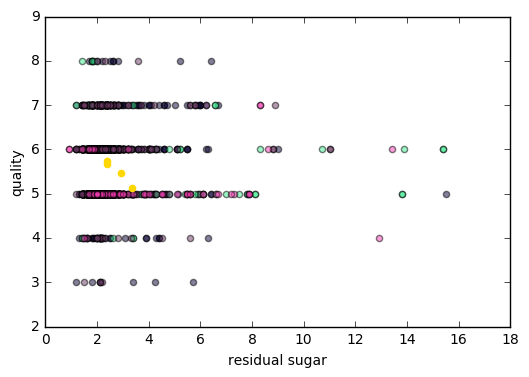

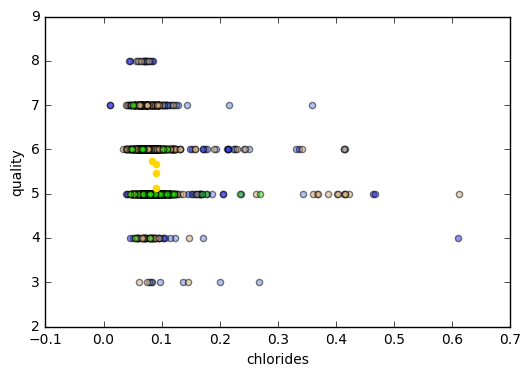

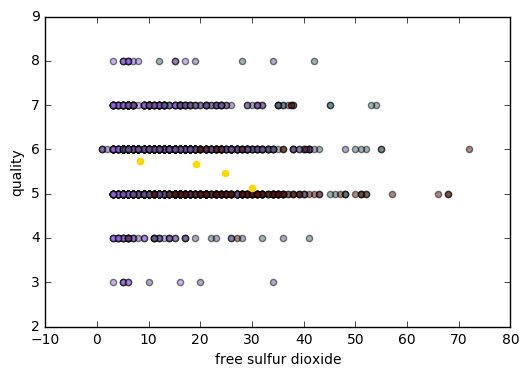

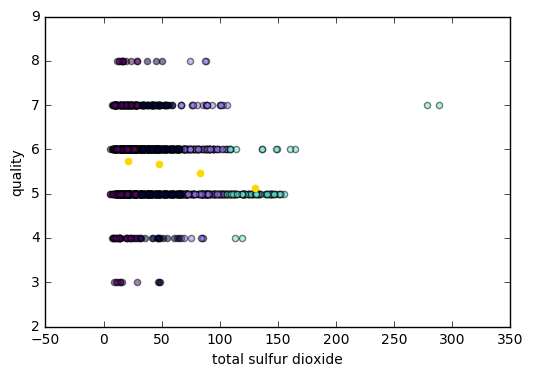

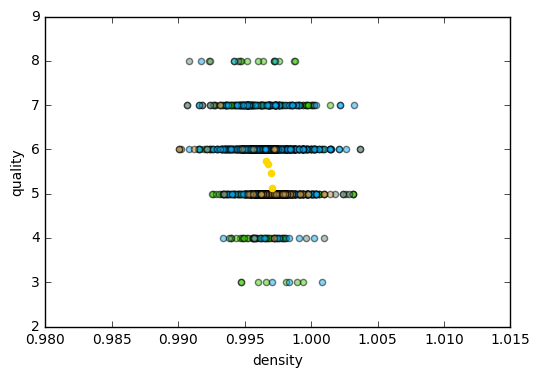

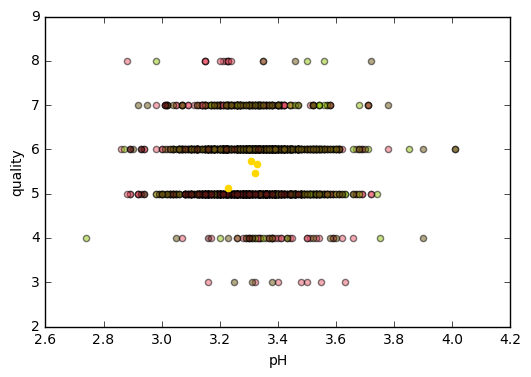

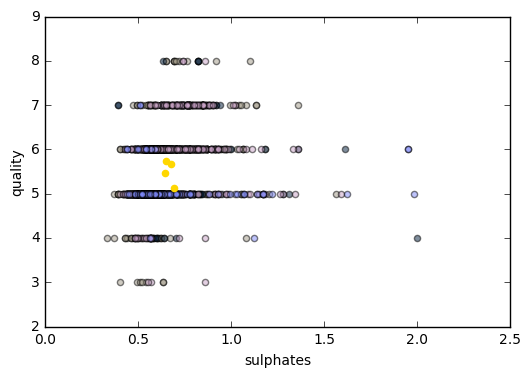

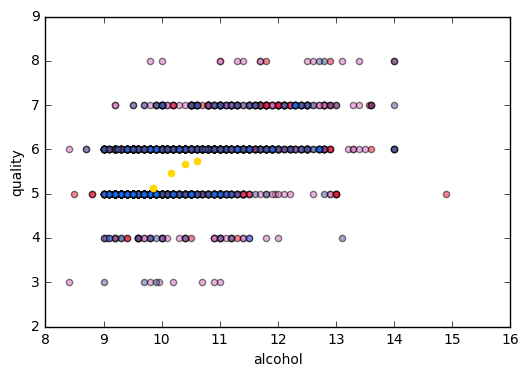

In [78]:
clusterDataUsingKMeans(clusters = 4, df=red)

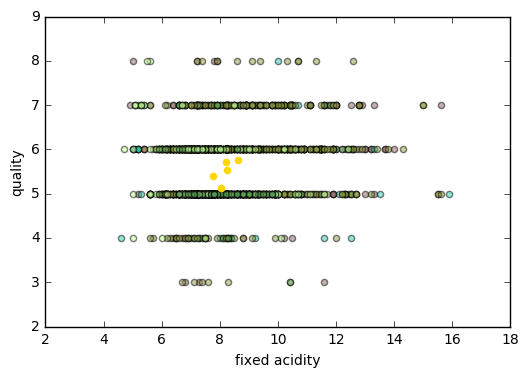

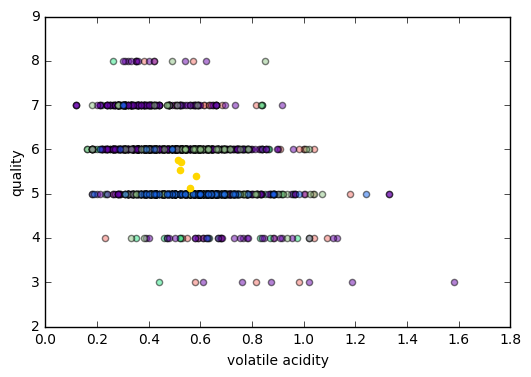

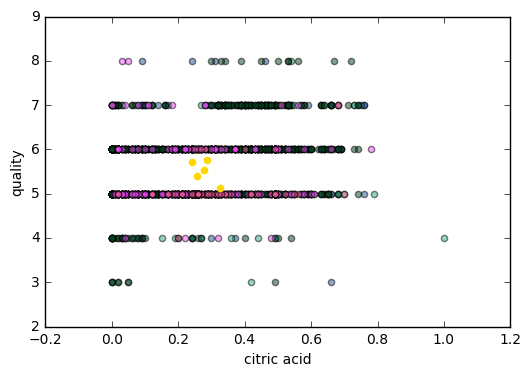

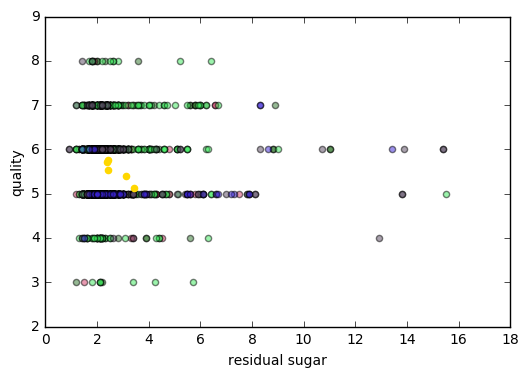

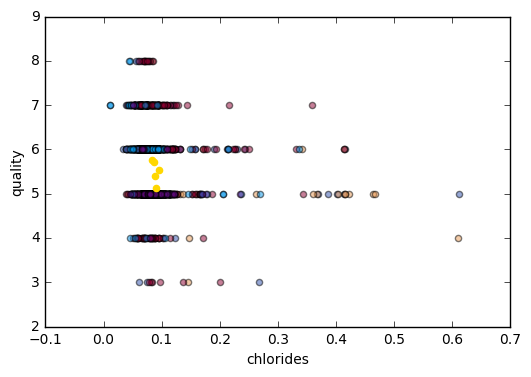

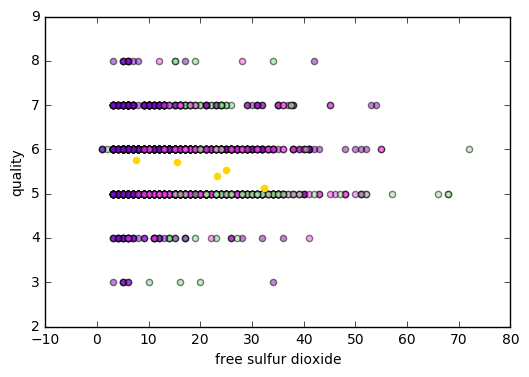

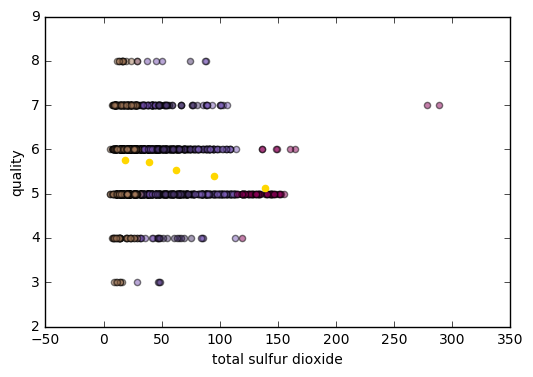

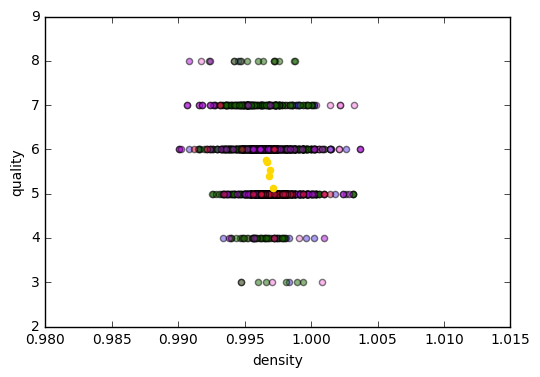

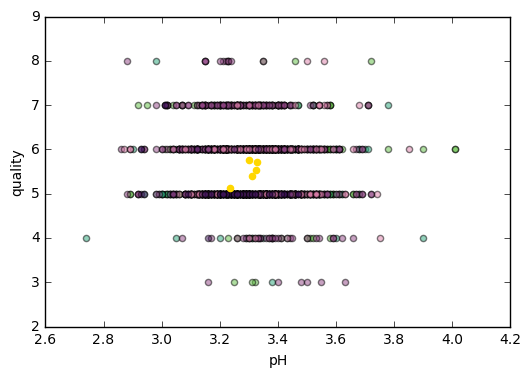

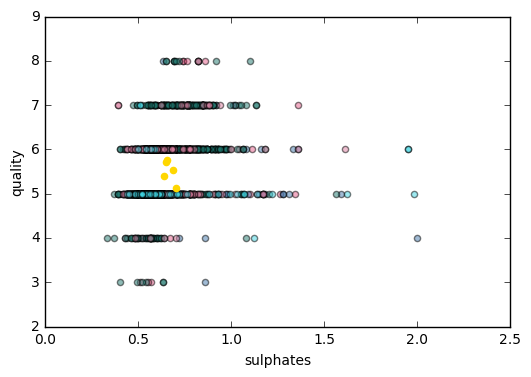

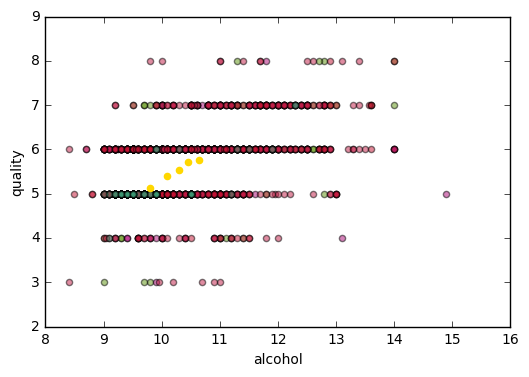

In [79]:
clusterDataUsingKMeans(clusters = 5,df=red)

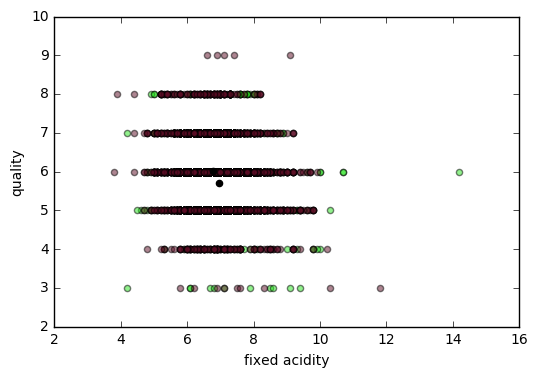

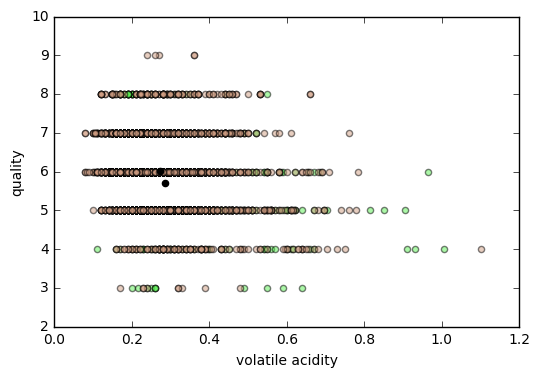

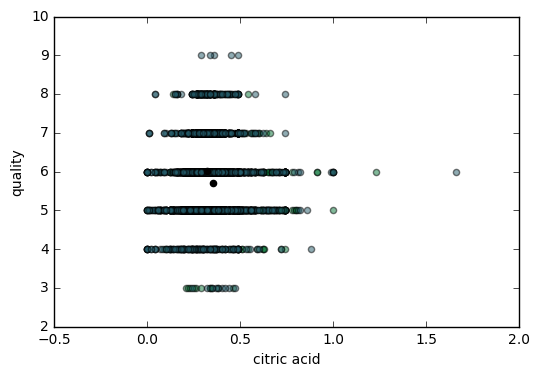

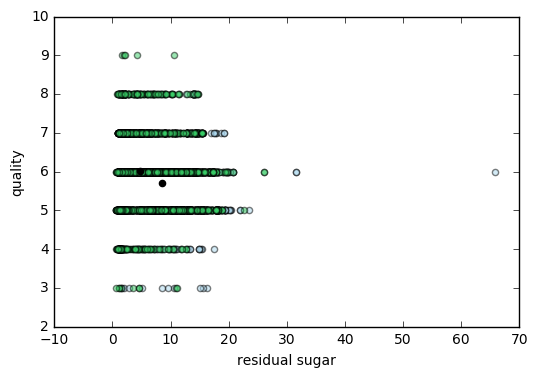

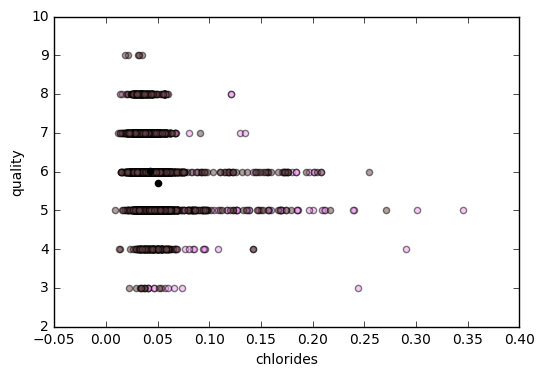

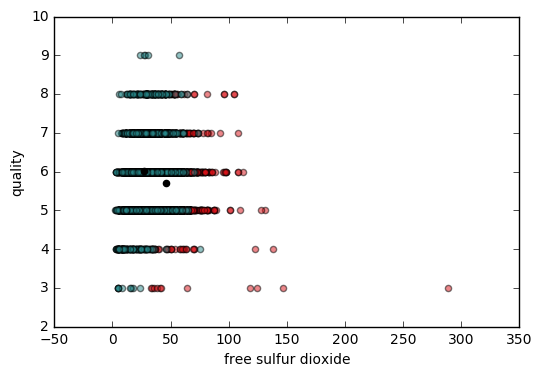

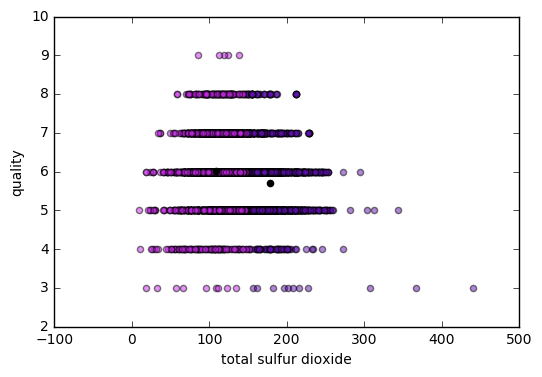

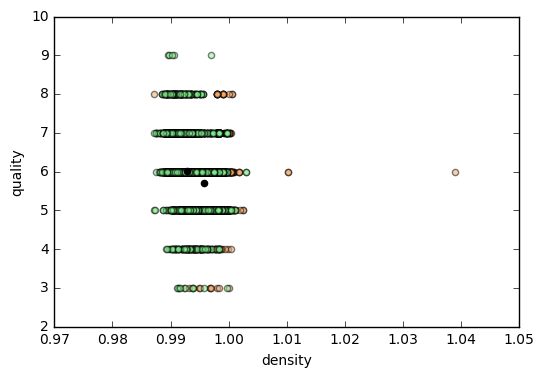

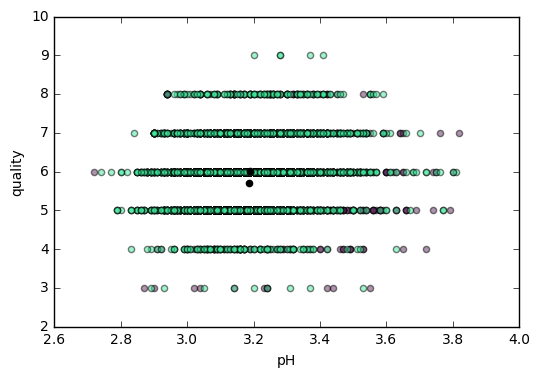

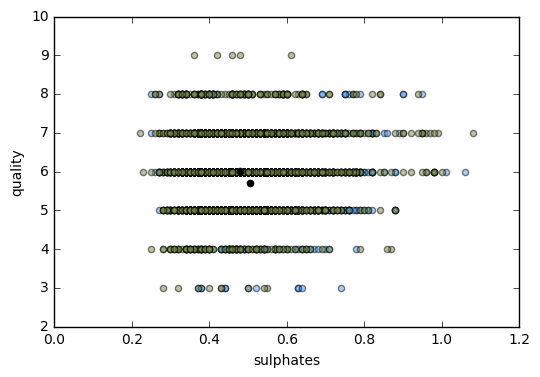

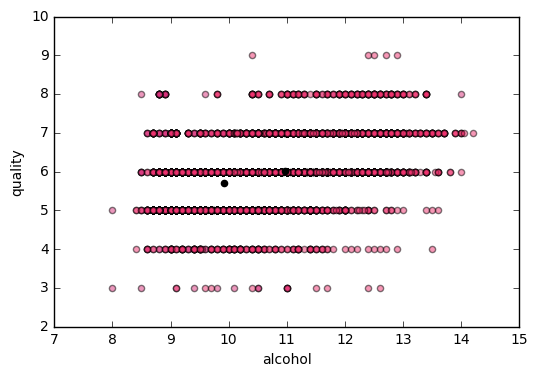

In [44]:
clusterDataUsingKMeans(clusters = 2,df=white)

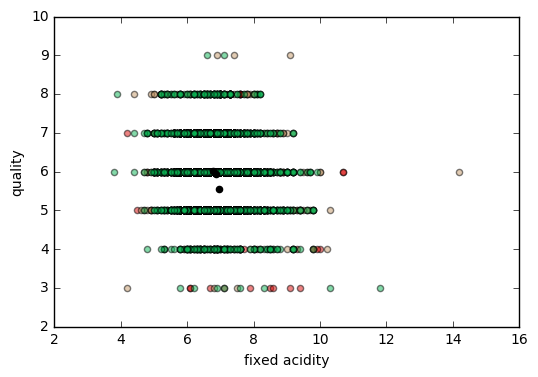

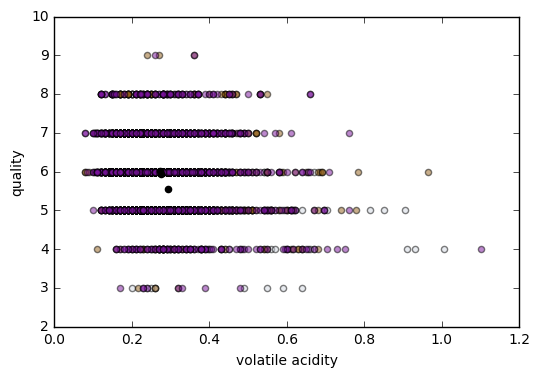

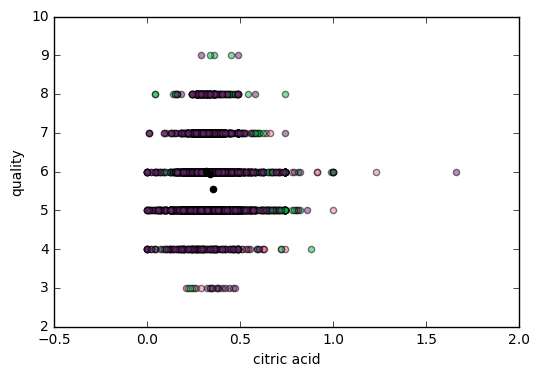

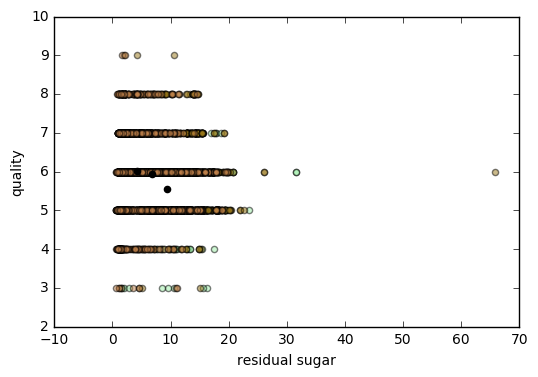

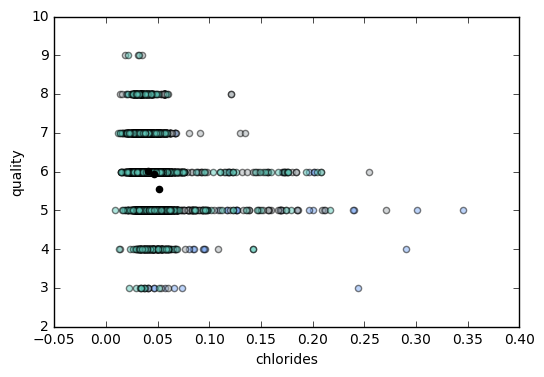

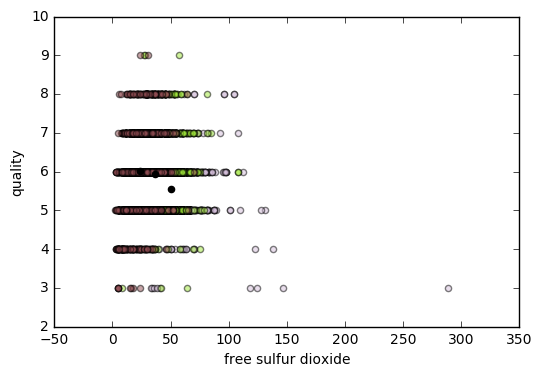

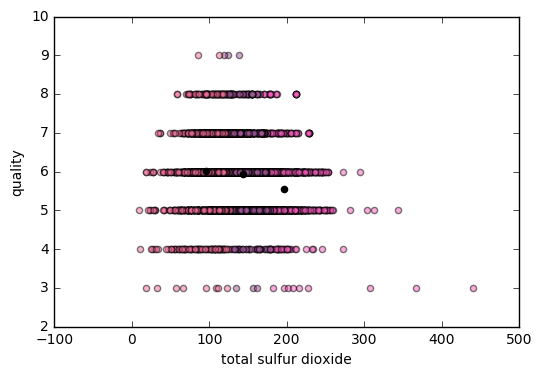

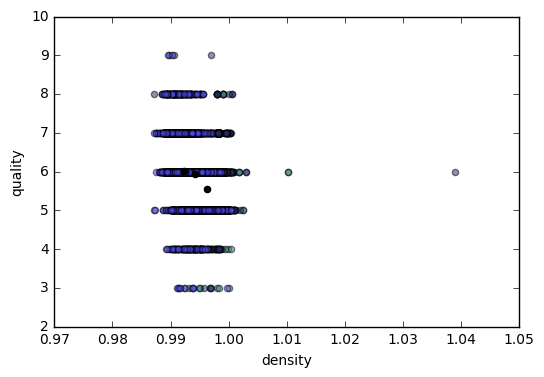

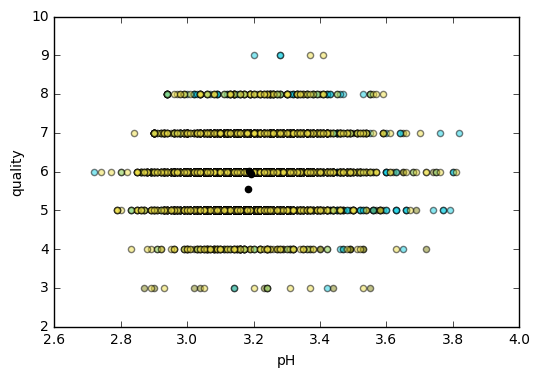

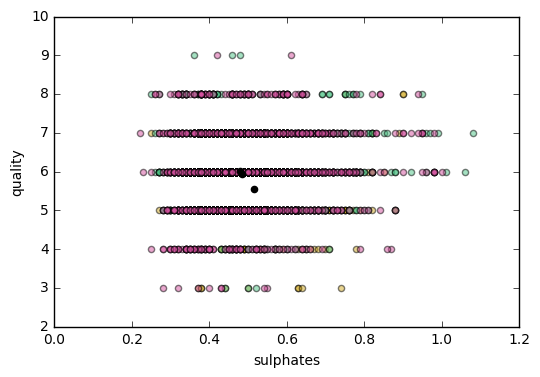

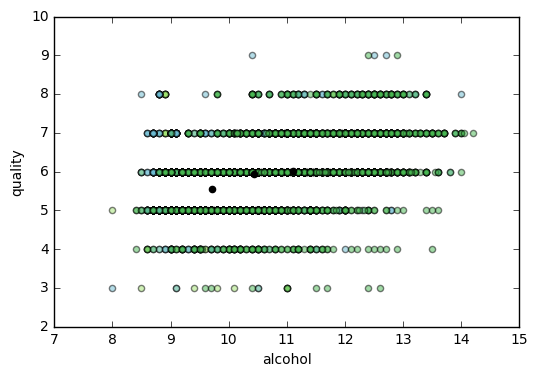

In [45]:
clusterDataUsingKMeans(clusters = 3,df=white)

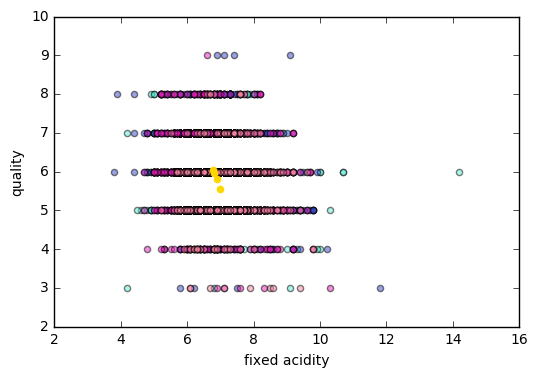

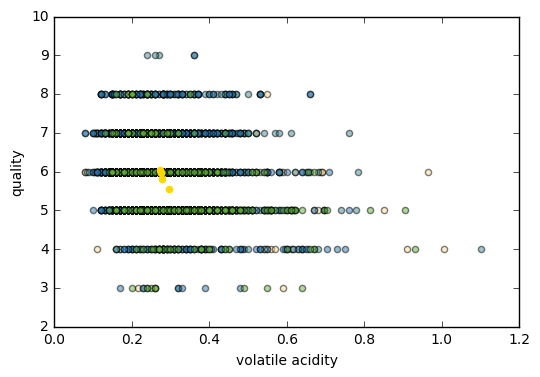

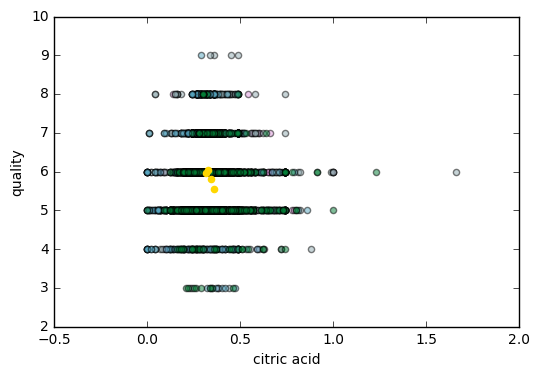

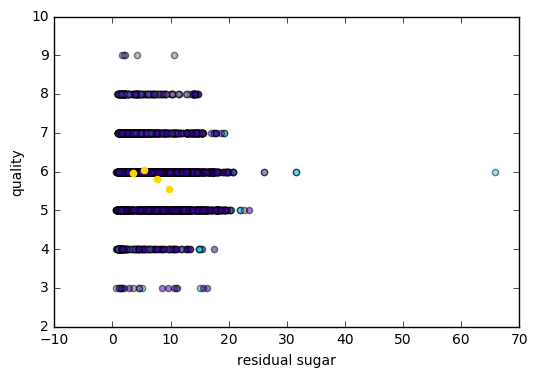

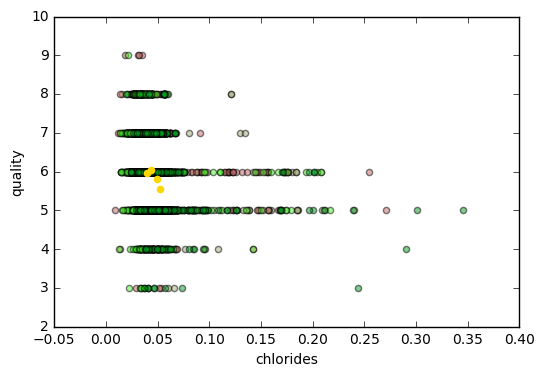

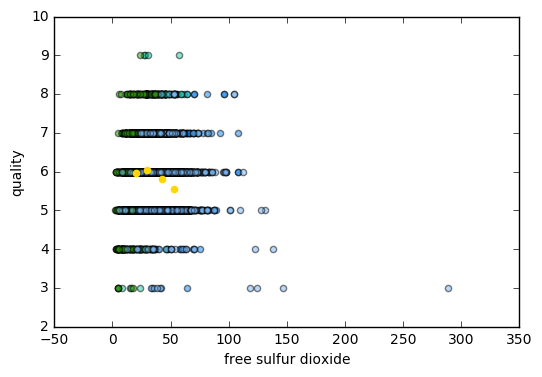

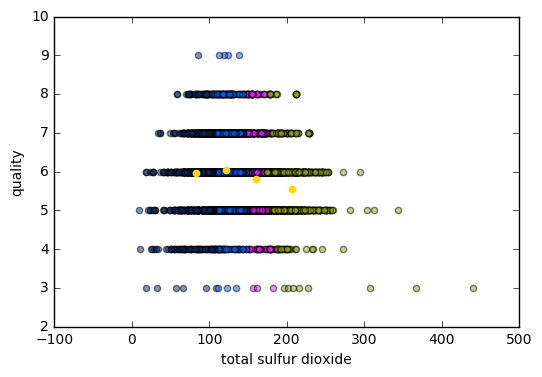

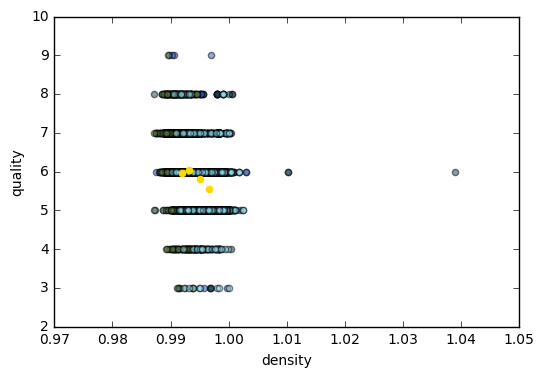

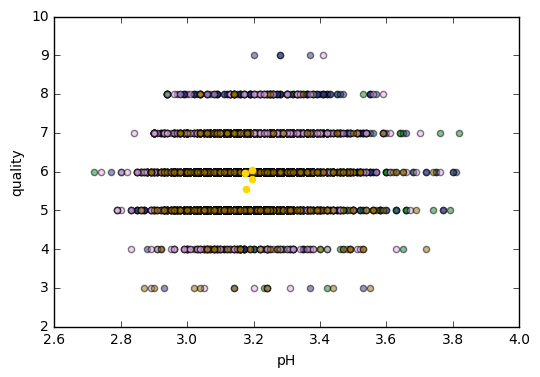

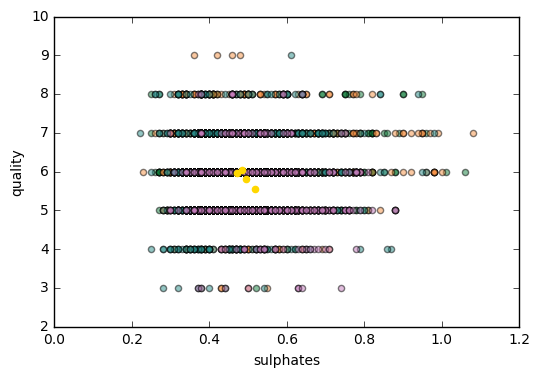

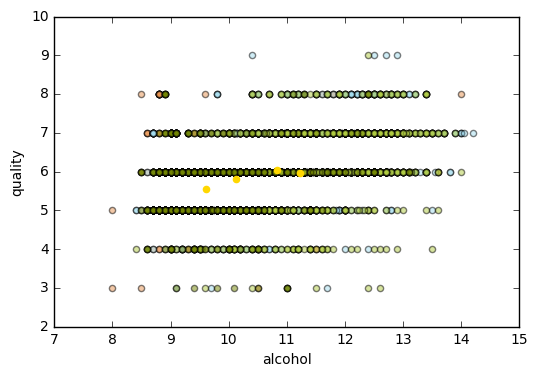

In [81]:
clusterDataUsingKMeans(clusters = 4,df=white)

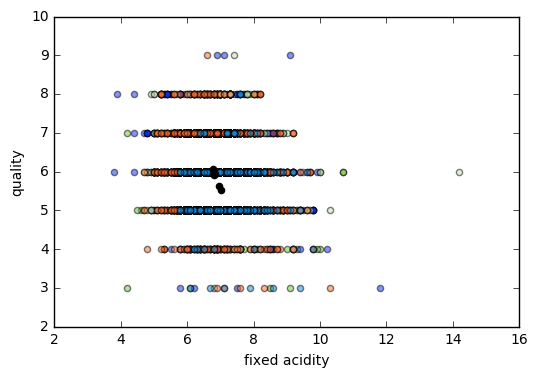

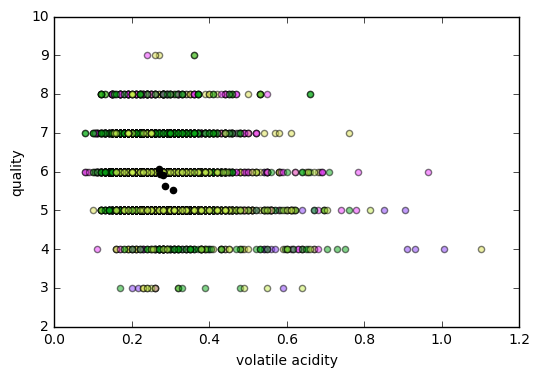

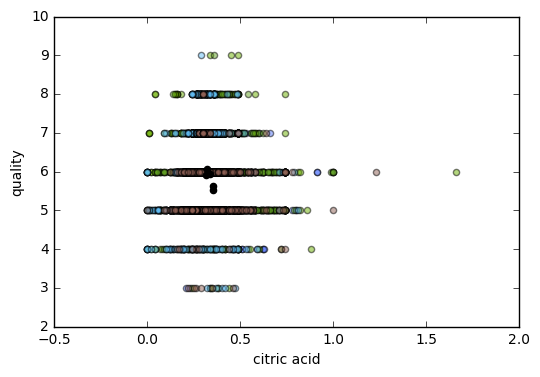

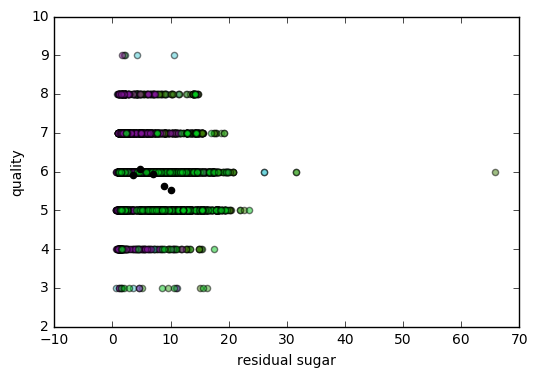

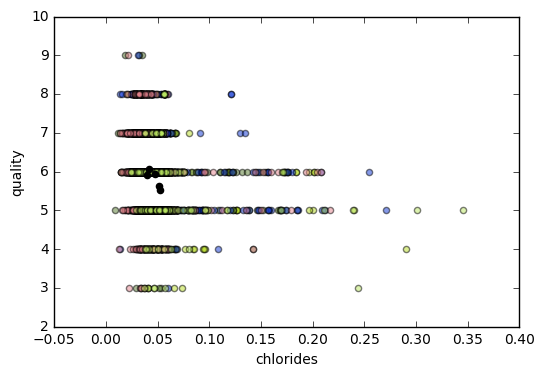

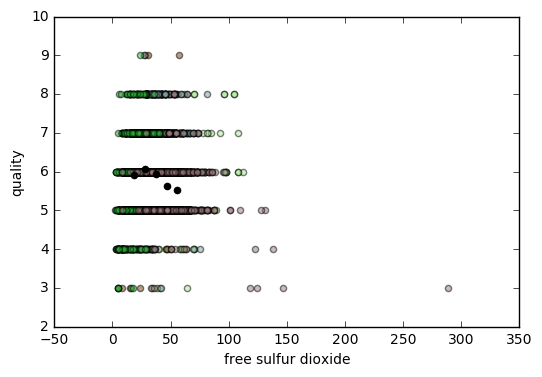

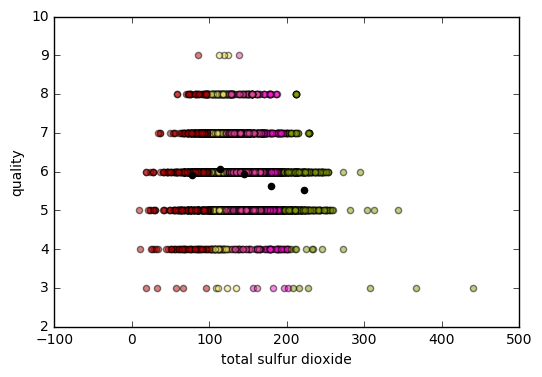

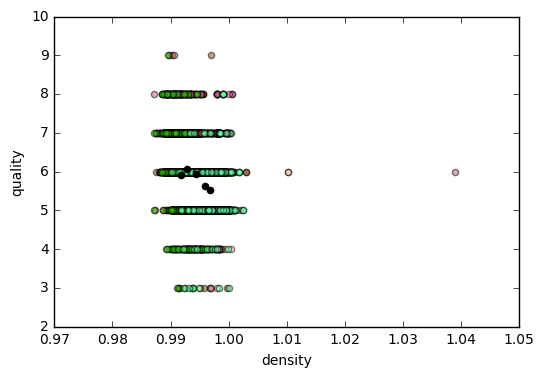

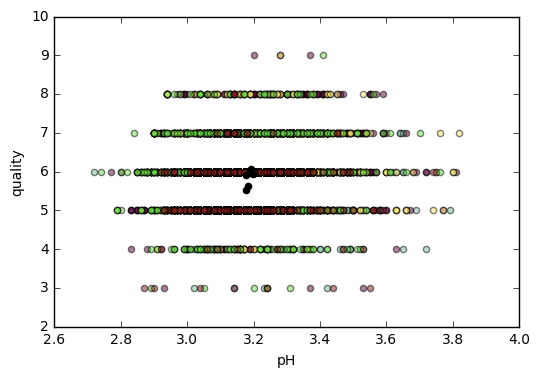

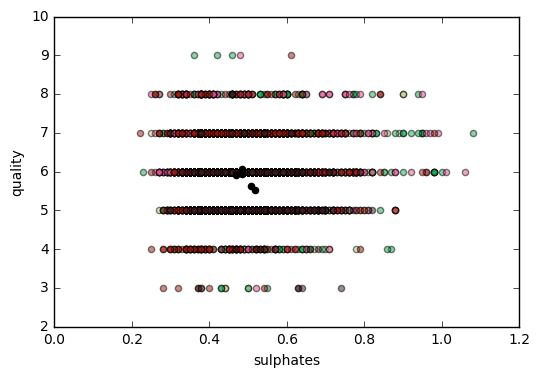

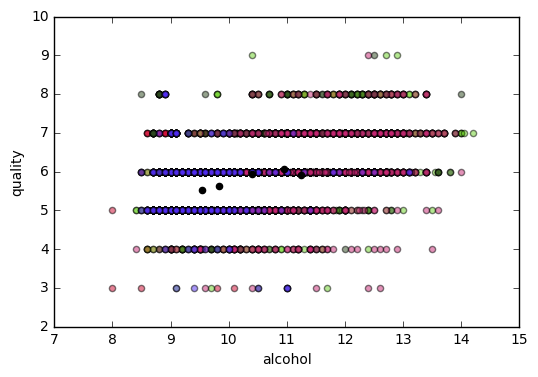

In [47]:
clusterDataUsingKMeans(clusters = 5,df=white)

In [70]:
def clusterSulfur(clusters = 2, df=red):
    c = KMeans(n_clusters=clusters, random_state=0).fit(df).cluster_centers_

    k = KMeans(n_clusters=clusters, random_state=0).fit_predict(df)
    df['label'] = k
    
    fig, ax = plt.subplots()

    for label in df['label'].unique():
        subset = df.loc[df['label'] == label, ['free sulfur dioxide','total sulfur dioxide']]
        ax.scatter(subset['free sulfur dioxide'],subset['total sulfur dioxide'],alpha=.5,c=[r(),r(),r()])
    ax.scatter(c[:,5],c[:,6],color='gold',label='Centroid',alpha=.99)
    plt.xlabel(df['free sulfur dioxide'].name)
    plt.ylabel(df['total sulfur dioxide'].name)
    plt.show()

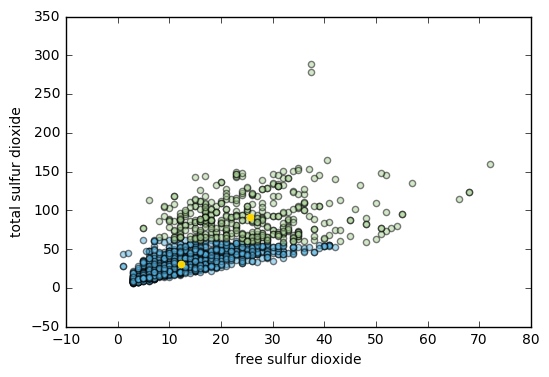

In [71]:
clusterSulfur(clusters=2, df= red)

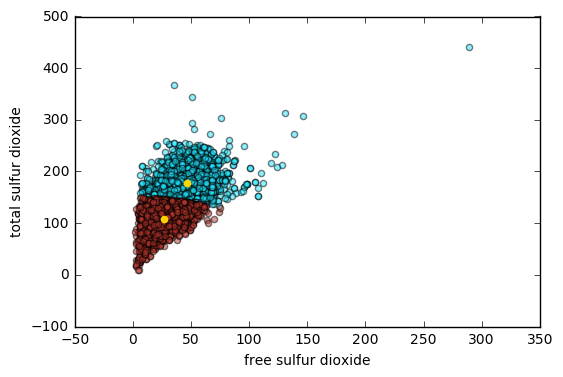

In [72]:
clusterSulfur(clusters=2, df=white)

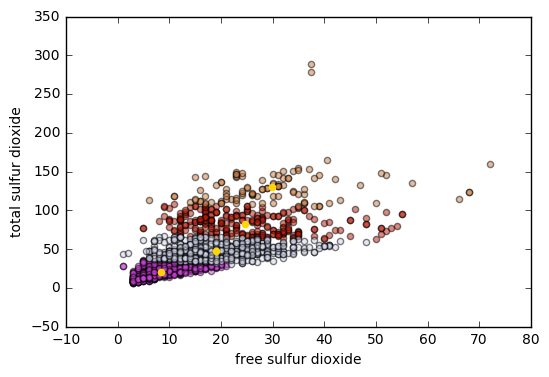

In [73]:
clusterSulfur(clusters=4, df= red)

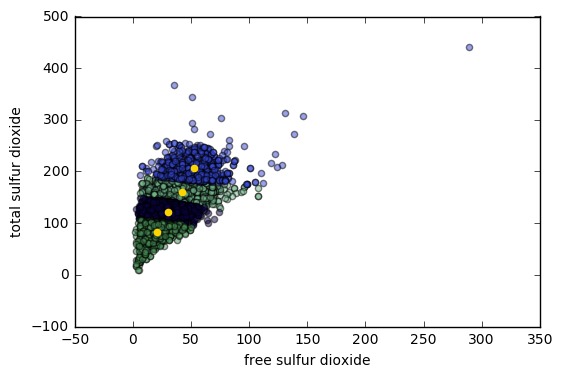

In [80]:
clusterSulfur(clusters=4, df= white)